In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


## Prepare a model for glass classification using KNN

# data collection

In [2]:
# read_csv file
glass=pd.read_csv(r'C:\Users\hp\Downloads\glass (1).csv')

In [3]:
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [6]:
glass.loc[glass['Type'] == 1, 'Type'] = 'building_windows_float_processed'
glass.loc[glass['Type'] == 2, 'Type'] = 'building_windows_non_float_processed' 
glass.loc[glass['Type'] == 3, 'Type'] = 'vehicle_windows_float_processed' 
glass.loc[glass['Type'] == 4, 'Type'] = 'vehicle_windows_non_float_processed' 
glass.loc[glass['Type'] == 5, 'Type'] = 'containers' 
glass.loc[glass['Type'] == 6, 'Type'] = 'tableware' 
glass.loc[glass['Type'] == 7, 'Type'] = 'headlamps'

In [7]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,building_windows_float_processed
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,building_windows_float_processed
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,building_windows_float_processed
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,building_windows_float_processed
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,building_windows_float_processed


In [9]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


# EDA with visualization

In [10]:
# first we cheack the missing values
glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

<AxesSubplot:>

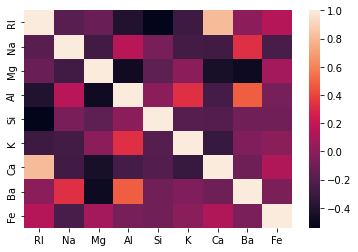

In [11]:
# now by using heatmap we will find the missing values
cor = glass.corr()
sns.heatmap(cor)


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RI', ylabel='Na'>

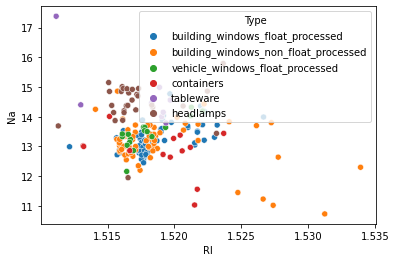

In [13]:
sns.scatterplot(glass['RI'],glass['Na'],hue=glass['Type'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='K', ylabel='Ca'>

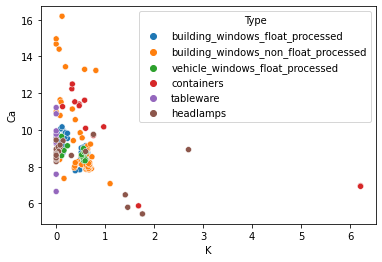

In [14]:
sns.scatterplot(glass['K'],glass['Ca'],hue=glass['Type'])

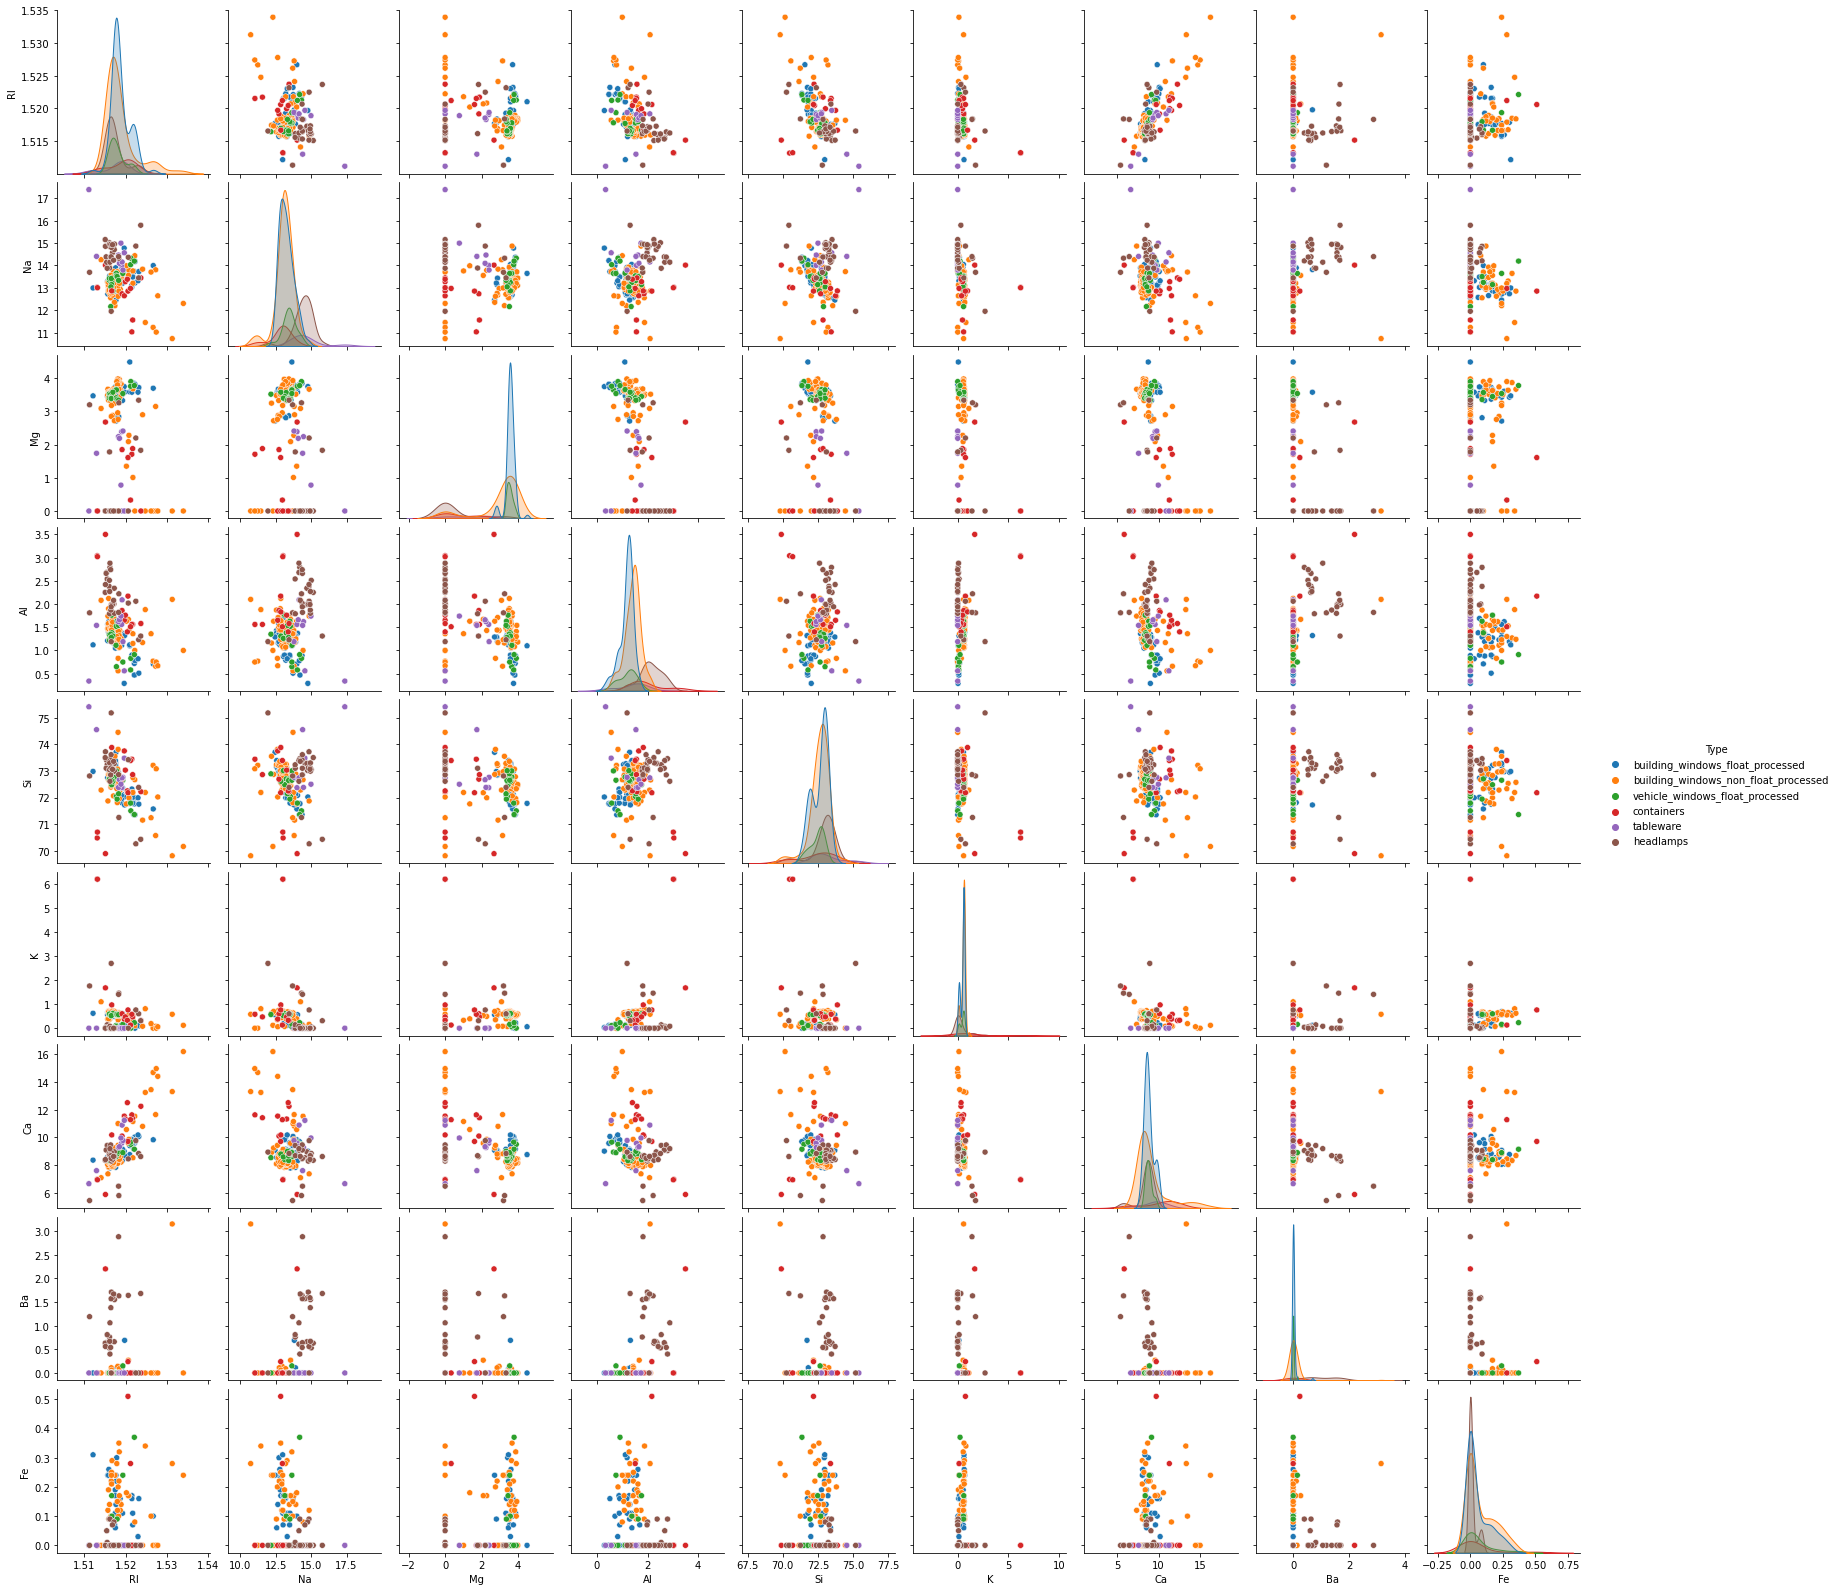

In [15]:
#pairwise plot of all the features
sns.pairplot(glass,hue='Type')
plt.show()

In [16]:
# Standardize the data & fit the model 
scaler = StandardScaler()
scaler.fit(glass.drop('Type',axis=1))

StandardScaler()

In [17]:
scaled_features = scaler.transform(glass.drop('Type',axis=1))
scaled_features

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [18]:
glass_= pd.DataFrame(scaled_features,columns=glass.columns[:-1])
glass_.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


# KNN

In [21]:
# Applying KNN
# split the data into train_test
glass_df= glass_.drop(['Ca','K'],axis=1)
X_train,X_test,y_train,y_test  = train_test_split(glass_df,glass['Type'],test_size=0.3,random_state=45) 


In [22]:
X_train,X_test

(           RI        Na        Mg        Al        Si        Ba        Fe
 165  1.103909 -2.268155 -0.559078  0.231064  0.270553 -0.352877 -0.586451
 132 -0.077703  0.027188  0.900234 -0.531832 -0.208266 -0.352877 -0.586451
 72  -0.803833 -0.390147  0.629219  0.150759  0.581138 -0.352877 -0.586451
 58  -0.272438  0.088560  0.733456 -0.551908  0.438787 -0.352877 -0.586451
 29  -0.173420 -0.402422  0.559728 -0.331070  0.270553 -0.352877 -0.586451
 ..        ...       ...       ...       ...       ...       ...       ...
 32  -0.203125 -0.684737  0.552779 -0.431451  0.412905 -0.171446  1.676673
 124  1.123713 -0.255127  0.691761 -0.592061  0.128201 -0.352877 -0.586451
 131  2.566071  0.358601 -1.865511 -0.170460 -1.825899 -0.352877  0.442242
 158 -0.199825  0.149933  0.504135  0.150759 -0.790614 -0.352877 -0.586451
 203 -0.589294  1.708802 -1.865511  1.094342  0.594079  3.094313 -0.586451
 
 [149 rows x 7 columns],
            RI        Na        Mg        Al        Si        Ba        F

In [23]:
knn = KNeighborsClassifier(n_neighbors=4,metric='manhattan')

In [24]:
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=4)

In [25]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

KNeighborsClassifier(metric='manhattan', n_neighbors=4)

In [26]:
y_pred = knn.predict(X_test)

In [28]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,y_pred))

                                      precision    recall  f1-score   support

    building_windows_float_processed       0.69      0.90      0.78        20
building_windows_non_float_processed       0.85      0.65      0.74        26
                          containers       0.25      1.00      0.40         1
                           headlamps       1.00      0.85      0.92        13
                           tableware       0.50      0.50      0.50         2
     vehicle_windows_float_processed       0.00      0.00      0.00         3

                            accuracy                           0.74        65
                           macro avg       0.55      0.65      0.56        65
                        weighted avg       0.77      0.74      0.74        65



In [29]:
accuracy_score(y_test,y_pred)

0.7384615384615385

In [31]:
# Finding the best K value
k_range = range(1,25)
k_scores = []
error_rate =[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    #kscores - accuracy
    scores = cross_val_score(knn,glass_df,glass['Type'],cv=5,scoring='accuracy')
    k_scores.append(scores.mean())
    
    #error rate
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    error_rate.append(np.mean(y_pred!=y_test))


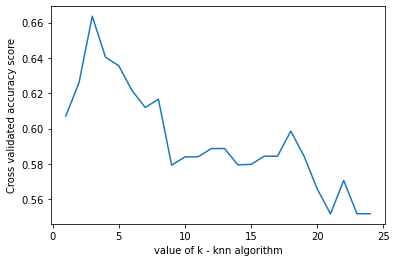

In [32]:
#plot k vs accuracy
plt.plot(k_range,k_scores)
plt.xlabel('value of k - knn algorithm')
plt.ylabel('Cross validated accuracy score')
plt.show()

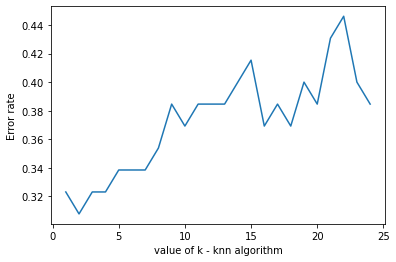

In [33]:
#plot k vs accuracy
plt.plot(k_range,error_rate)
plt.xlabel('value of k - knn algorithm')
plt.ylabel('Error rate')
plt.show()

In [34]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


## Implement a KNN model to classify the animals in to categorie

In [35]:
# Read csv file
zoo=pd.read_csv(r'C:\Users\hp\Downloads\Zoo (1).csv')

In [36]:
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [37]:
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


# EDA With Visulization

In [38]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [39]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [40]:
# now to find the missing values
zoo.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

<AxesSubplot:>

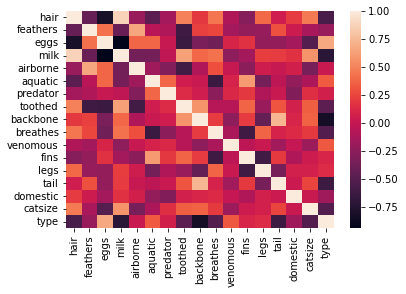

In [41]:
# now by using heatmap we will find the missing values
cor = zoo.corr()
sns.heatmap(cor)

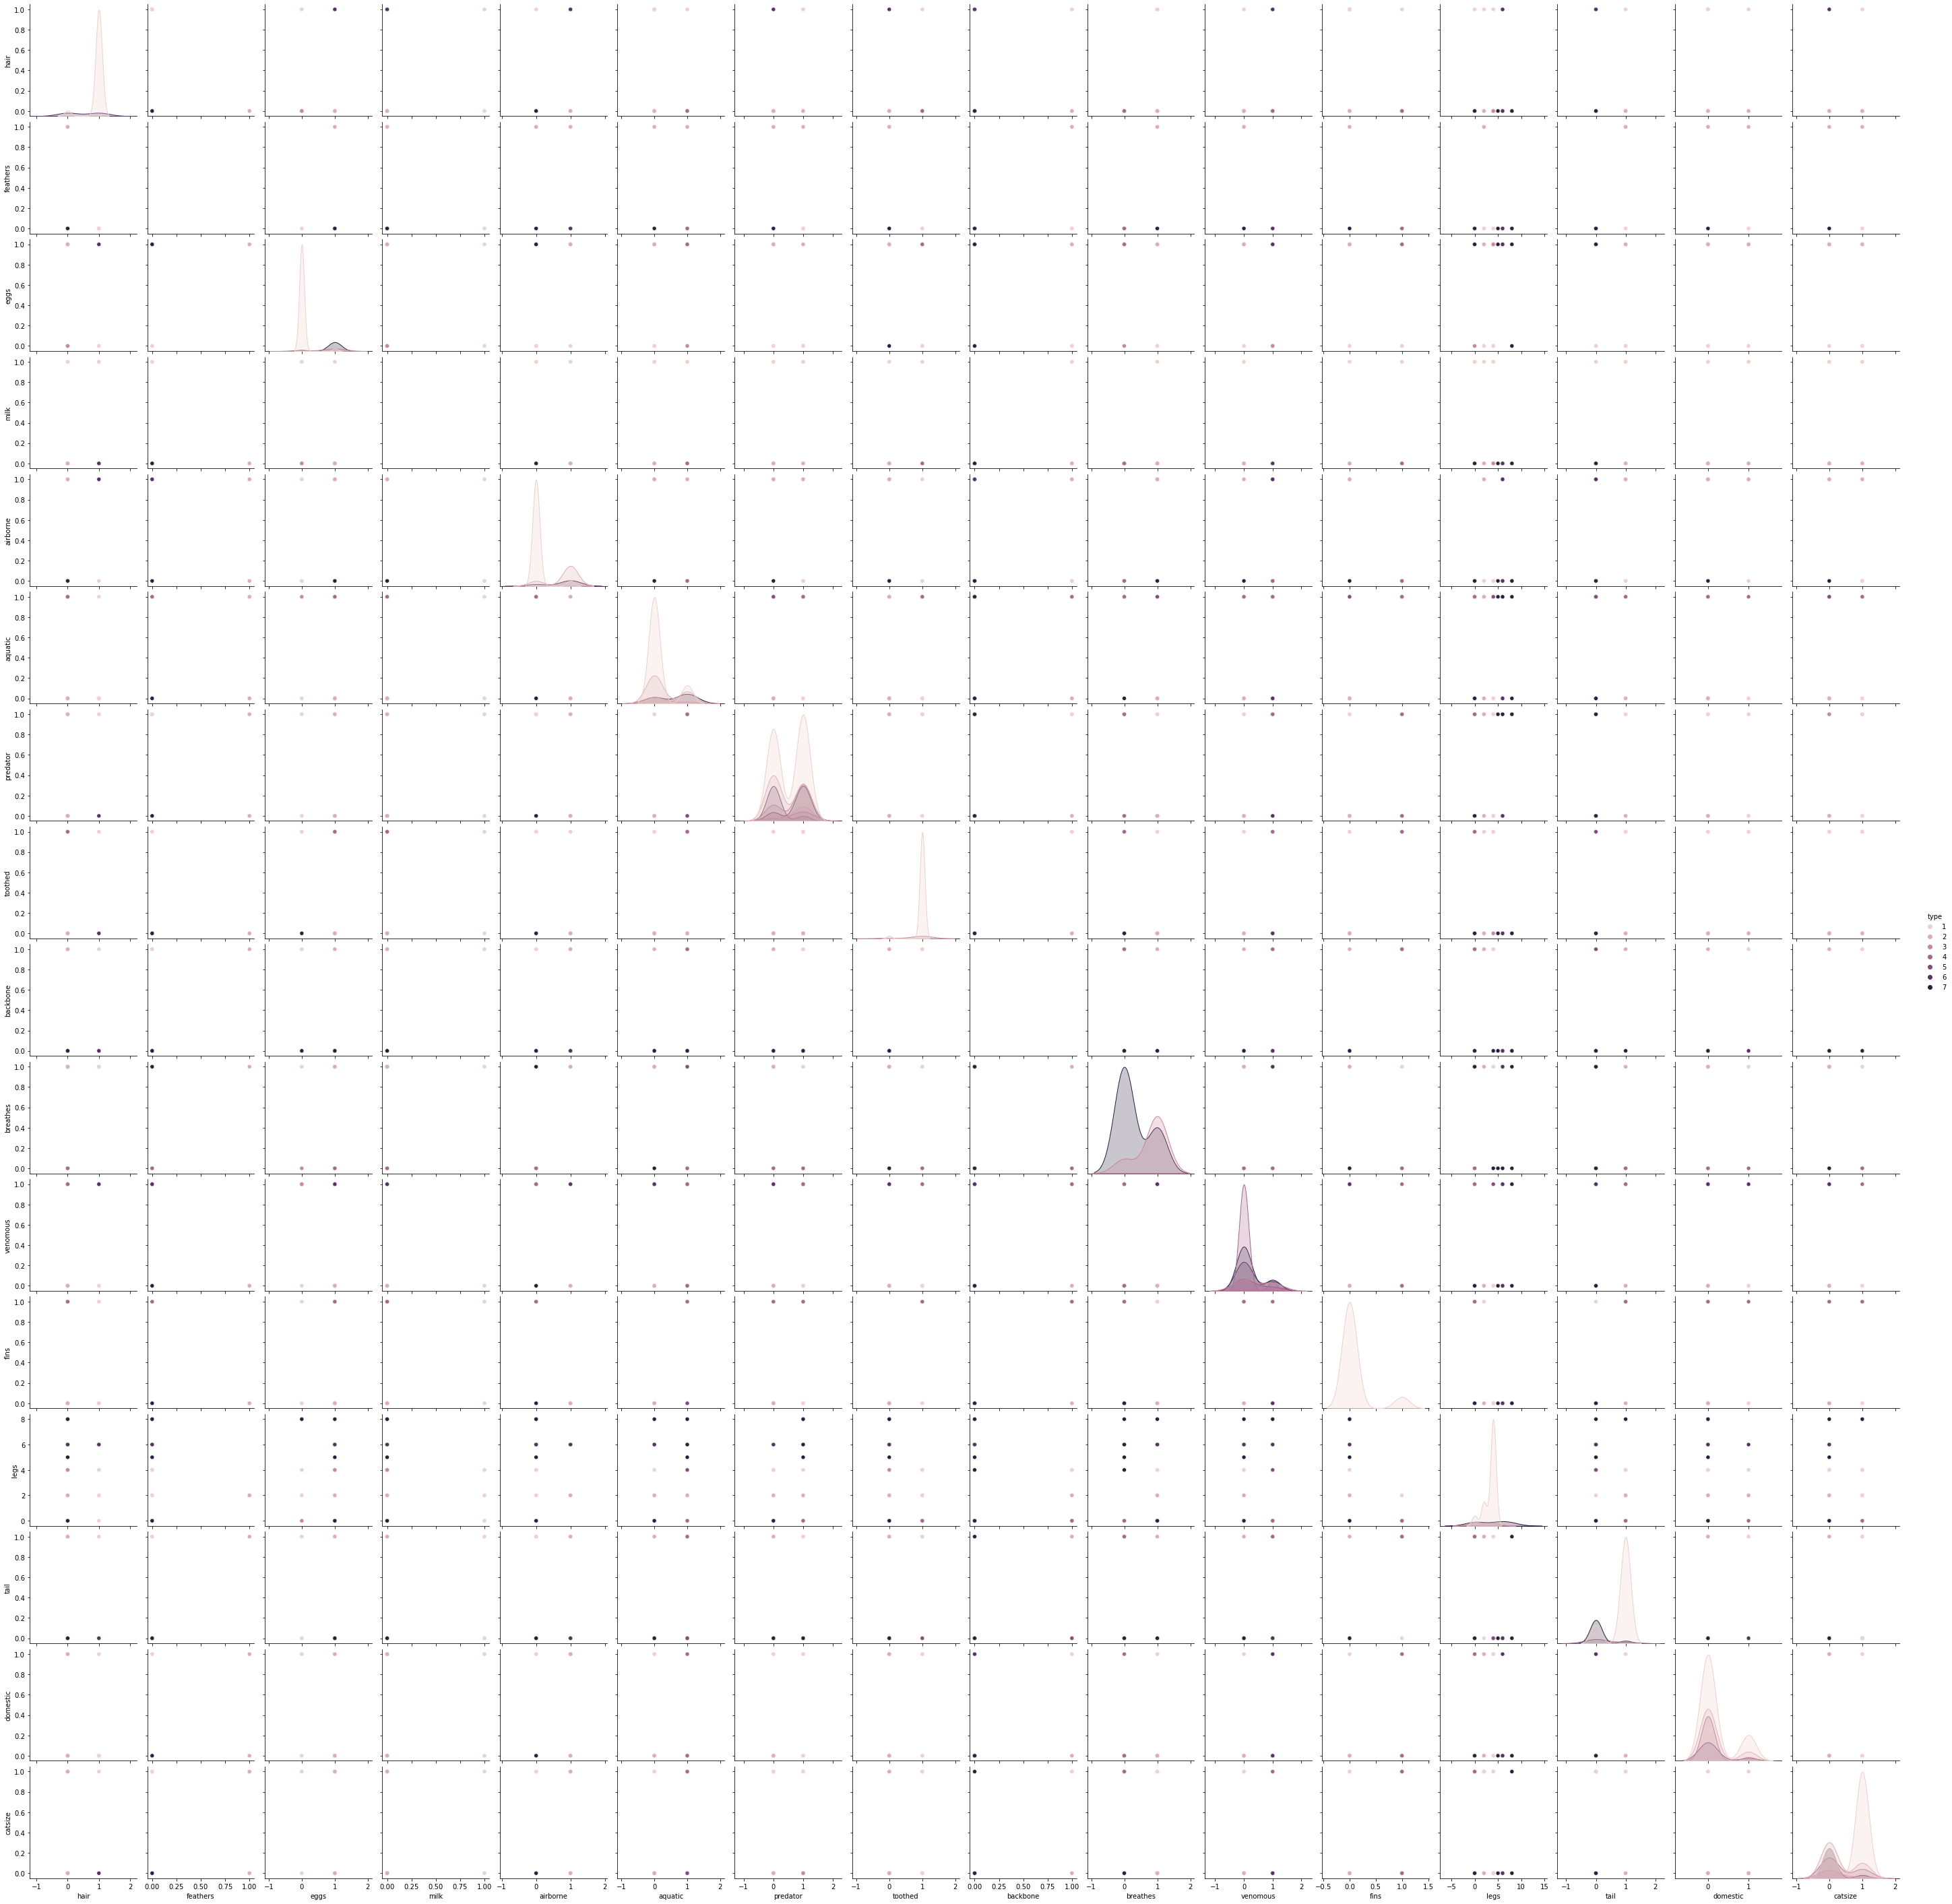

In [43]:
#pairwise plot of all the features
sns.pairplot(zoo,hue='type')
plt.show()

# KNN

In [45]:
X = zoo.iloc[:,1:17]
y = zoo.iloc[:,17]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
k_values = np.arange(1,25)
train_accuracy = []
test_accuracy = []

In [47]:
for i, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

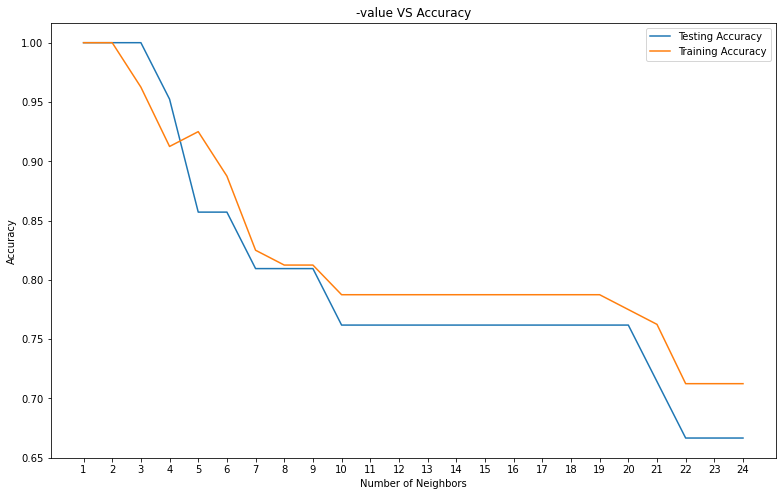

In [48]:
plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.show()

In [49]:
# applying KNN Algorithm
knn = KNeighborsClassifier(n_neighbors=5)

In [50]:
scores = []
cv_scores = []

In [51]:
knn.fit(X_train, y_train)
y_pred_KNeighborsClassifier = knn.predict(X_test)

In [52]:
score = accuracy_score(y_pred_KNeighborsClassifier,y_test)
scores.append(score)

In [53]:
score_knn=cross_val_score(knn, X,y, cv=10)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


In [54]:
score_knn.mean()

0.8809090909090909

In [55]:
score_knn.std()*2

0.12072782037115655

In [56]:
cv_score = score_knn.mean()

In [57]:
cv_scores.append(cv_score)

In [58]:
cv_scores

[0.8809090909090909]